## Bayesian Analysis
---
**Elo notes**

In probability theory and statistics, Bayes’ theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. 

One of the many applications of Bayes’ theorem is __Bayesian inference__, a particular approach to statistical inference. 

With the Bayesian probability interpretation the theorem expresses how a subjective degree of belief should rationally change to account for availability of prior related evidence. 

Bayes' theorem is stated mathematically as the following equation:



$$ P(H\mid E) = \frac{P(E\mid H) \cdot P(H)}{P(E)}$$



${\displaystyle P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}},}$

where A and B are events and P(B) ≠ 0.

$P(A)$ and $P(B)$ are the probabilities of observing $A$ and $B$ without regard to each other.

$P( A | B )$, a conditional probability, is the probability of observing event $A$ given that $B$ is true.

$P( B | A )$ is the probability of observing event $B$ given that $A$ is true.



In the __Bayesian interpretation__, probability measures a ***degree of belief.***

Bayes’ theorem then links the degree of belief in a proposition before and after accounting for evidence. 

##### Proposition is A and evidence is B,

$P ( A )$, the prior, is the initial degree of belief in $A$.

$P ( A | B )$, the “posterior,” is the degree of belief having accounted for $B$.

$P(B |A )/P(B)$ represents the support $B$ provides for $A$.

---
#### Bayesian inference

Bayesian inference has found application in a wide range of activities, including science, engineering, philosophy, medicine, sport, and law. In the philosophy of decision theory, Bayesian inference is closely related to subjective probability, often called "Bayesian probability".

Bayesian inference derives the __posterior probability__ as a consequence of two __Antecedents__, a __prior probability__ and a "__likelihood function__" derived from a __statistical model__ for the observed data. Bayesian inference computes the posterior probability according to __Bayes' theorem__:

$$ P(H\mid E) = \frac{P(E\mid H) \cdot P(H)}{P(E)}$$

where

$\textstyle \mid $ means "event __conditional probability__ on" (so that $ \textstyle (A\mid B) $ means ***A given B***).

$\textstyle H$ stands for any ***hypothesis*** whose probability may be affected by Experimental data (called ***evidence*** below). Often there are competing hypotheses, and the task is to determine which is the most probable. A __PMF / PDF__ representing your initial beliefs about the parameter(s). 


The ***evidence*** $\textstyle E$ corresponds to new data that were not used in computing the prior probability.


$\textstyle P(H)$, the __prior probability or prior distribution__, is the estimate of the probability of the hypothesis $\textstyle H$ ***before*** the data $\textstyle E$, the current evidence, is observed.

$\textstyle P(H\mid E)$, the __posterior probability__, is the probability of $\textstyle H$ ***given*** $\textstyle E$, i.e., **after** $\textstyle E$ is observed.  This is what we want to know: the probability of a hypothesis ***given*** the observed evidence.

$\textstyle P(E\mid H)$ is the probability of observing $\textstyle E$ ***given*** $\textstyle H$.  As a function of $\textstyle E$ with $\textstyle H$ fixed, this is the ***Likelihood function or sampling distribution*** – it indicates the compatibility of the evidence with the given hypothesis. The product of prior and likelihood (Bayesian-update) - The posterior probability becomes the prior of the next Bayesian-update 
##### The likelihood function is a function of the evidence, $\textstyle E$, while the posterior probability is a function of the hypothesis, $\textstyle H$.


$\textstyle P(E)$ is sometimes termed the __marginal likelihood__ or ***model evidence***. Normalizing Constant: - The probability of observing the data. - In Bayesian analysis, this term ensures the sum of all probabilities is 1. This factor is the same for all possible hypotheses being considered (as is evident from the fact that the hypothesis $\textstyle H$ does not appear anywhere in the symbol, unlike for all the other factors), so this factor does not enter into determining the relative probabilities of different hypotheses.

For different values of $\textstyle H$, only the factors $\textstyle P(H)$ and $\textstyle P(E\mid H)$, both in the numerator, affect the value of $\textstyle P(H\mid E)$ – the posterior probability of a hypothesis is proportional to its prior probability (its inherent likeliness) and the newly acquired likelihood (its compatibility with the new observed evidence).

Bayes' rule can also be written as follows:


$P(H\mid E) = \frac{P(E\mid H)}{P(E)} \cdot P(H)$

where the factor 
$$\textstyle \frac{P(E\mid H)}{P(E)}$$

can be interpreted as the impact of $E$ on the probability of $H$.

__Note__ that this is expressed in words as __posterior is proportional to likelihood times prior__, or sometimes as __posterior = likelihood times prior, over evidence__.


In [110]:
from __future__ import division
from collections import OrderedDict

from bayes_discretecase import Dbayes
from elocoin import Coin

import pandas as pd
import numpy as np
import random


import scipy.stats as scis

import itertools
import operator

import seaborn as sea
sea.set_palette('Set2')

%matplotlib inline



___Bayesian theory___ calls for the use of the posterior predictive distribution to do predictive inference, i.e., to predict the distribution of a new, unobserved data point.

#### Bayesian Analysis - Discrete data

A box contains a 4-sided die, a 6-sided die, an 8-sided die, a 12-sided die, and a 20-sided die. A die is selected at random, and the rest are destroyed. We would like to determine which die I have selected, given only information of what I roll.

### Prior

Our prior probability is a uniform distribution of the parameters $P(\theta) $: The dices. 

Each dice has equal chance to be selected.

$P(\theta) $ = U{4, 6, 8, 12, 20} = 1./5 = 0.2

### Likelihood

Probability is used before data are available to describe plausibility of a future outcome, given a value for the parameter. Likelihood is used after data are available to describe plausibility of a parameter value.

$P(E\mid \theta) = \begin{cases}
\text{Unif}\{1, 2, 3, 4\},& \theta = 4 \\
\text{Unif}\{1, \ldots, 6\}, & \theta = 6 \\
\text{Unif}\{1, \ldots, 8\}, & \theta = 8 \\
\text{Unif}\{1, \ldots, 12\}, & \theta = 12\\
\text{Unif}\{1, \ldots, 20\}, & \theta = 20\\
\end{cases}$

*   4-side: 1./4 = 0.25
*   6-side: 1./6 = 0.166
*   8-side: 1./8 = 0.125
*   12-side: 1./12 = 0.083
*   20-side: 1./20 = 0.05



### Evidence
**Normalizing Constant or Marginal Likelihood**
- The probability of observing the data. 
- In Bayesian analysis, this term ensures the sum of all probabilities is 1

$ P(E) = \sum_{i=1}^n P(E | \theta_i) P(\theta_i) $

Say I roll a 3

$P(E)$ = (1./4 $\times$ 1./5) + (1./6 $\times$ 1./5) + (1./8 $\times$ 1./5) + (1./12 $\times$ 1./5) + (1./20 $\times$ 1./5) = 0.135


### Posterior

- The product of __Prior__ and __Likelihood__ (Bayesian-update)
- The posterior probability becomes the prior of the next Bayesian-update

$\textstyle P(H\mid E)$

Say I roll an 8. After one bayesian update, what is the probability that I chose each of the dice?


$P(E\mid \theta)$ : Likelihood
```
likelihood(8|4)  = 0
likelihood(8|6)  = 0
likelihood(8|8)  = 1/8
likelihood(8|12) = 1/12
likelihood(8|20) = 1/20
```

```
P(E) : P(8) = 1/5*0 + 1/5*0 + 1/5*1/8 + 1/5*1/12 + 1/5*1/20
     = 31/600
     = 0.0517
```

```
posterior(4)  =    1/5*0 / P(8) = 0
posterior(6)  =    1/5*0 / P(8) = 0
posterior(8)  =  1/5*1/8 / P(8) = 15/31 = 0.484
posterior(12) = 1/5*1/12 / P(8) = 10/31 = 0.323
posterior(20) = 1/5*1/20 / P(8) =  6/31 = 0.194
```




$P(\theta\,|\,8) = \begin{cases}
\frac{15}{31}, & \theta = 8\\
\frac{10}{31}, & \theta = 12\\
\frac{6}{31}, & \theta = 20\\
0,& \theta < 8
\end{cases}$



* 8-sided die: (prior * likelihood) / normalizing =  48.4%
* 12-sided die:(prior * likelihood) / normalizing =  32.3%
* 20-sided die:(prior * likelihood) / normalizing =  19.4%

__These dices do not contain 8__

* 4-sided die: (prior * 0(zero)) / normalizing =  0%  
* 6-sided die: (prior * 0(zero)) / normalizing =  0% 

### Coin Simulation

In [13]:
baseline = np.linspace(0,0.99, 100)
prior_baseline = {}
for i in baseline:
    prior_baseline[round(i, 2)] = .01

In [14]:
def likelihoodf_bernoulli(data, p):
    if data == 'H':
        return p
    else:
        return 1 - p

In [16]:
coin_1 = Dbayes(prior_baseline.copy(), likelihoodf_bernoulli)

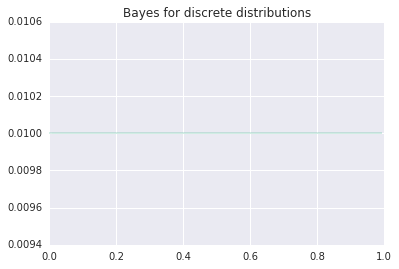

In [24]:
coin_1.print_distribution()

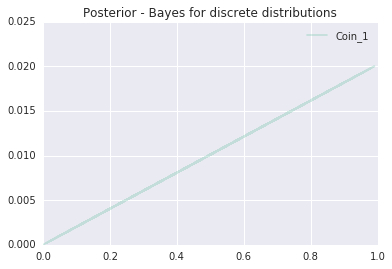

In [30]:
coin_1.print_distribution('Coin_1')

In [51]:
coins = ['coin_{}'.format(i) for i in xrange(1, 9)]

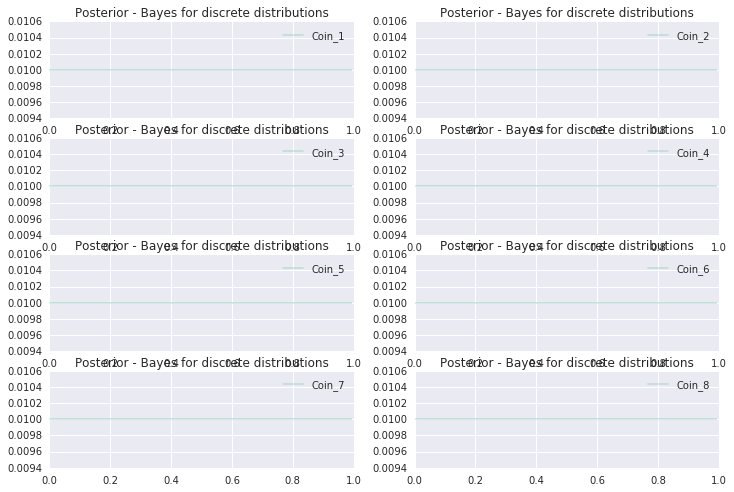

In [91]:
plt.figure(figsize=(12, 8))
for c, coin in enumerate(coins, 1):
    coin = Dbayes(prior_baseline.copy(), likelihoodf_bernoulli)
    plt.subplot(4, 2, c)
    coin.print_distribution('Coin_{}'.format(c))
    plt.tight_layout

    

In [82]:
my_coin = Coin()

In [84]:
my_coin.flip()

'H'

In [ ]:
coin

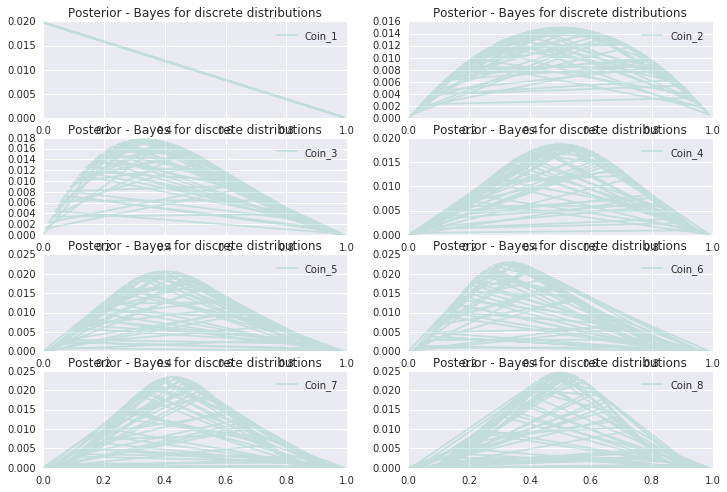

In [92]:
plt.figure(figsize=(12, 8))
for c, coin in enumerate(coins, 1):
    coin = Dbayes(prior_baseline.copy(), likelihoodf_bernoulli)
    
    for i in xrange(c):
        coin.update_posterior(my_coin.flip())
    
    plt.subplot(4, 2, c)
    coin.print_distribution('Coin_{}'.format(c))
    plt.tight_layout


In [103]:
coinf_0 = Dbayes(prior_baseline.copy(), likelihoodf_bernoulli)
coinf_1 = Dbayes(prior_baseline.copy(), likelihoodf_bernoulli)
coinf_2 = Dbayes(prior_baseline.copy(), likelihoodf_bernoulli)
coinf_10 = Dbayes(prior_baseline.copy(), likelihoodf_bernoulli)
coinf_50 = Dbayes(prior_baseline.copy(), likelihoodf_bernoulli)
coinf_250 = Dbayes(prior_baseline.copy(), likelihoodf_bernoulli)

In [104]:
coinf_1.update_posterior(my_coin.flip())

In [105]:
for i in xrange(2):
    coinf_2.update_posterior(my_coin.flip())

In [106]:
for i in xrange(10):
    coinf_10.update_posterior(my_coin.flip())

In [107]:
for i in xrange(50):
    coinf_50.update_posterior(my_coin.flip())

In [108]:
for i in xrange(250):
    coinf_250.update_posterior(my_coin.flip())

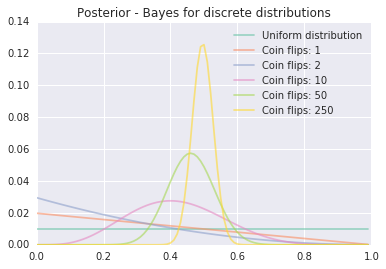

In [111]:
coinf_0.print_distribution(label='Uniform distribution')
coinf_1.print_distribution(label='Coin flips: 1')
coinf_2.print_distribution(label='Coin flips: 2')
coinf_10.print_distribution(label='Coin flips: 10')
coinf_50.print_distribution(label='Coin flips: 50')
coinf_250.print_distribution(label='Coin flips: 250')